# Example 1 - Extract parameters from a force signal

Detect onset and offset of a signal,  the first maximum and maximum variation on production of force.

In [1]:
%pylab inline
import novainstrumentation as ni
import seaborn

Populating the interactive namespace from numpy and matplotlib


## 1. Load data and plot 

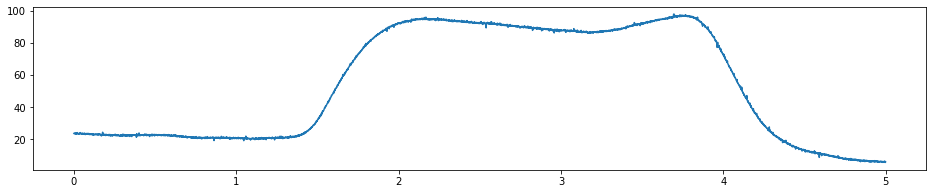

In [3]:
figure(figsize=(16,3))
t,s = loadtxt('../data/force.txt')
plot(t,s)

## 2. Clean and ressample
Execute: 
* a) smooth filter with a window of 100 samples  
* b) ressample both time and signal with a subsampling (ratio of 1:10)
* c) plot result


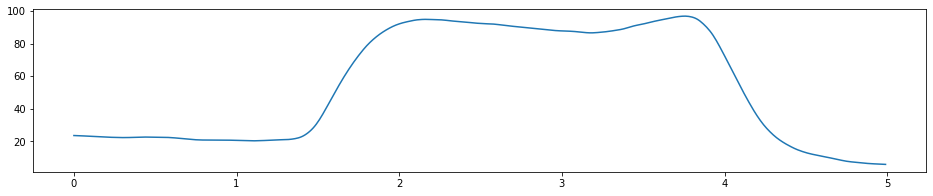

In [4]:
s = ni.smooth(s,100) 
s_ = s[::10]
t_ = t[::10]

figure(figsize=(16,3))
plot(t_,s_)

## 3. Extract activation information:

* a) On set time - 5% of the full scale above the minimum
* b) Off set time 
* b) Activation time - From onset to offset
* c) First maximum delay from onset
* d) Max production of force delay

Anottate on the graph with vertical lines

Onset: 1.462000 s
Offset: 4.266000 s
Activation time: 2.804000 s
First maximum delay: 0.700000 s
Delay to derivate maximum: 0.115000 s


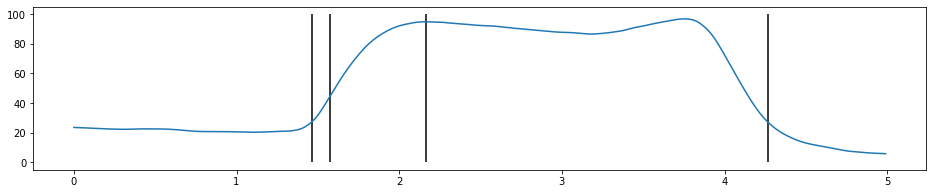

In [6]:
mn = s[0]
mx=max(s)

p = ni.find(s > mn+0.05*(mx-mn))  # extract the first occurence

onset = t[p[0]]
print("Onset: %f s" % onset)

offset = t[p[-1]]
print("Offset: %f s" % offset)

act_time = offset-onset
print("Activation time: %f s" % act_time )

first_max =  t[ni.peaks(s,60)[0]] # use threshold above 60
print("First maximum delay: %f s" % (first_max - onset) )

t_max_diff = t[ni.peaks(diff(s),0.1)[0]]
print("Delay to derivate maximum: %f s" % (t_max_diff - onset) )


figure(figsize=(16, 3))
plot(t_, s_)

vlines([onset,offset,first_max,t_max_diff], 0, 100, 'k')